<a href="https://colab.research.google.com/github/Smokie-18/Uber-Data-Analysis/blob/main/Uber_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 📋 Data Schema
The dataset contains the following columns:

| Column Name | Description |
| :--- | :--- |
| **Date** | Date of the booking |
| **Time** | Time of the booking |
| **Booking ID** | Unique identifier for each ride booking |
| **Booking Status** | Status of booking (Completed, Cancelled by Customer, Cancelled by Driver, etc.) |
| **Customer ID** | Unique identifier for customers |
| **Vehicle Type** | Type of vehicle (Go Mini, Go Sedan, Auto, eBike/Bike, UberXL, Premier Sedan) |
| **Pickup Location** | Starting location of the ride |
| **Drop Location** | Destination location of the ride |
| **Avg VTAT** | Average time for driver to reach pickup location (in minutes) |
| **Avg CTAT** | Average trip duration from pickup to destination (in minutes) |
| **Cancelled Rides by Customer** | Customer-initiated cancellation flag |
| **Reason for cancelling by Customer** | Reason for customer cancellation |
| **Cancelled Rides by Driver** | Driver-initiated cancellation flag |
| **Driver Cancellation Reason** | Reason for driver cancellation |
| **Incomplete Rides** | Incomplete ride flag |
| **Incomplete Rides Reason** | Reason for incomplete rides |
| **Booking Value** | Total fare amount for the ride |
| **Ride Distance** | Distance covered during the ride (in km) |
| **Driver Ratings** | Rating given to driver (1-5 scale) |
| **Customer Rating** | Rating given by customer (1-5 scale) |
| **Payment Method** | Method used for payment (UPI, Cash, Credit Card, Uber Wallet, Debit Card) |

# Uber Ride Bookings Analysis and Prediction


The notebook covers the following steps:

1.  **Data Loading and initial exploration**: Loading the dataset and checking for basic information and missing values.
2.  **Data Cleaning and Preparation**: Handling missing values and converting data types for analysis.
3.  **Exploratory Data Analysis (EDA)**: Visualizing key aspects of the data, such as booking status distribution, cancellations, ride patterns by time and vehicle type, and top pickup/drop locations.
4.  **Predictive Analytics with Machine Learning**: Building and evaluating machine learning models to predict booking status.


In [9]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import random

In [10]:
df = pd.read_csv('/content/ncr_ride_bookings.csv')

# Checking the dataset

In [11]:
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [13]:
df.describe()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


# Cleaning and preparing Data

In [14]:
df.head(5)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [15]:
# checking null values
df.isna().sum()

,0
Date,0
Time,0
Booking ID,0
Booking Status,0
Customer ID,0
Vehicle Type,0
Pickup Location,0
Drop Location,0
Avg VTAT,10500
Avg CTAT,48000


In [16]:
df['Payment Method'].value_counts()

,count
Payment Method,
UPI,45909
Cash,25367
Uber Wallet,12276
Credit Card,10209
Debit Card,8239


In [17]:
df['Reason for cancelling by Customer'] = df['Reason for cancelling by Customer'].fillna('Not cancelled')
df['Cancelled Rides by Driver'] = df['Cancelled Rides by Driver'].fillna(0)
df['Cancelled Rides by Customer'] = df['Cancelled Rides by Customer'].fillna(0)
df['Driver Cancellation Reason'] = df['Driver Cancellation Reason'].fillna('Not cancelled')
df['Incomplete Rides'] = df['Incomplete Rides'].fillna(0)
df['Incomplete Rides Reason'] = df['Incomplete Rides Reason'].fillna('Not incomplete')

df['Booking Value'] = df['Booking Value'].fillna(0)
df['Ride Distance'] = df['Ride Distance'].fillna(0)
df['Driver Ratings'] = df['Driver Ratings'].fillna(0)
df['Customer Rating'] = df['Customer Rating'].fillna(0)
df['Avg CTAT'] = df['Avg CTAT'].fillna(0)
df['Avg VTAT'] = df['Avg VTAT'].fillna(0)
df['Payment Method'] = df['Payment Method'].fillna('Cancelled or incomplete ride')

In [18]:
import datetime as dt

# changing string to datetime

df['Time'] = pd.to_datetime(df['Time'])
df['Date'] = pd.to_datetime(df['Date'])

In [19]:
df['is_cancelled'] = (df['Cancelled Rides by Customer'] == 1) | (df['Cancelled Rides by Driver'] == 1)
df['is_cancelled'] = df['is_cancelled'].astype(int)

In [20]:
df['is_cancelled'].value_counts()

,count
is_cancelled,
0,112500
1,37500


In [21]:
# Calculate the number of completed rides
rides_completed = (df['Incomplete Rides'] == 0).sum()

# Calculate the success rate
success_rate_rides = (rides_completed / len(df)) * 100

acceptance_rate = 100 - (((df['is_cancelled'] == 1).sum() / len(df)) * 100)

print(f"Acceptance Rate: {acceptance_rate:.2f}%")
print(f"Success Rate: {success_rate_rides:.2f}%")

Acceptance Rate: 75.00%
Success Rate: 94.00%


# Plots

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
palettes = [ 'Greys', 'mako', 'rocket', 'vlag', 'Blues', 'YlGnBu', 'PuBuGn', 'viridis', 'cividis']
sns.set(style="whitegrid")

In [24]:
df['DayOfWeek'] = df['Date'].dt.day_name()
df['Hour'] = df['Time'].dt.hour

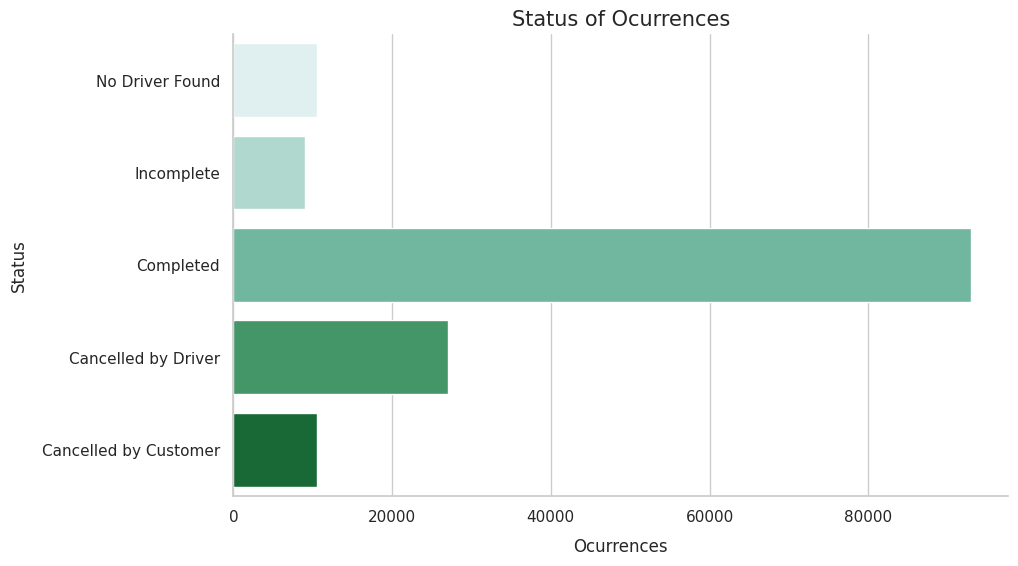

In [25]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(data = df, y='Booking Status',palette='BuGn',hue='Booking Status')

plt.ylabel('Status',labelpad=10)
plt.xlabel('Ocurrences',labelpad=10)
ax.set_title('Status of Ocurrences', fontsize = 15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

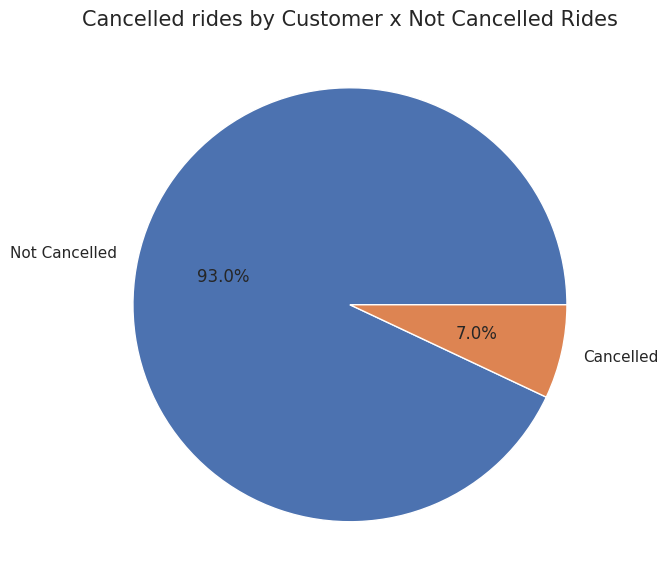

In [26]:
fig, ax = plt.subplots(figsize=(7,9))
plt.pie(df['Cancelled Rides by Customer'].value_counts(),labels=['Not Cancelled','Cancelled'], autopct='%1.1f%%')
plt.title('Cancelled rides by Customer x Not Cancelled Rides', fontsize = 15)
plt.show()

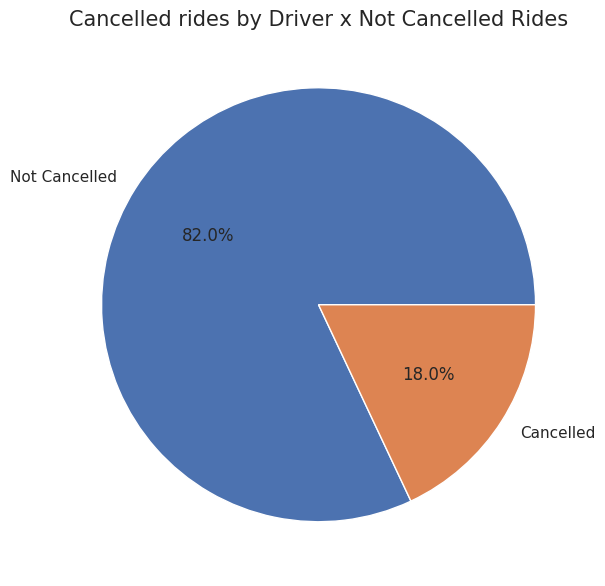

In [27]:
fig, ax = plt.subplots(figsize=(7,9))
plt.pie(df['Cancelled Rides by Driver'].value_counts(),labels=['Not Cancelled','Cancelled'], autopct='%1.1f%%')
plt.title('Cancelled rides by Driver x Not Cancelled Rides', fontsize = 15)
plt.show()

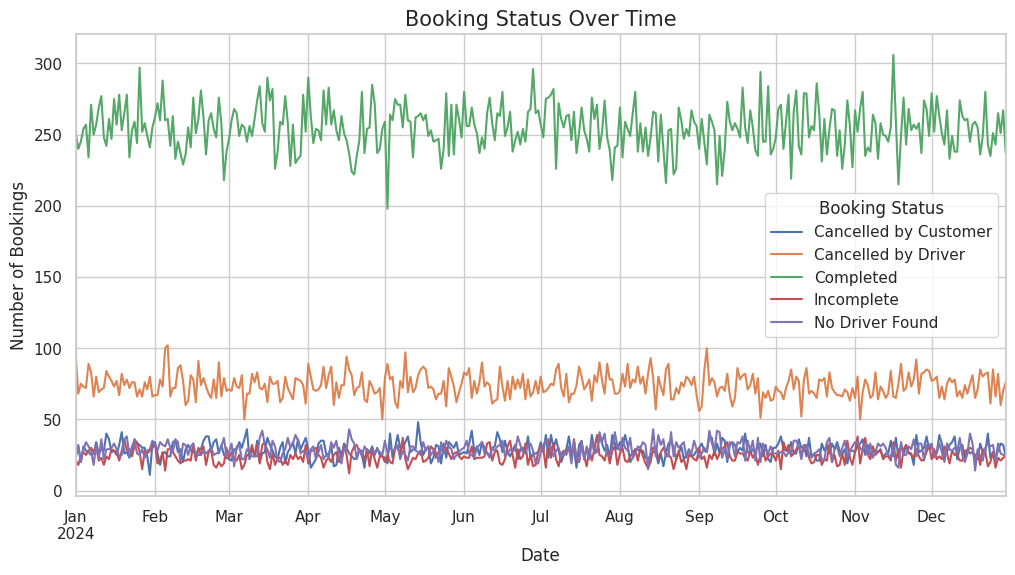

In [28]:
df.groupby(['Date', 'Booking Status']).size().unstack().plot(figsize=(12,6))
plt.title('Booking Status Over Time', fontsize = 15)
plt.ylabel('Number of Bookings')
plt.show()

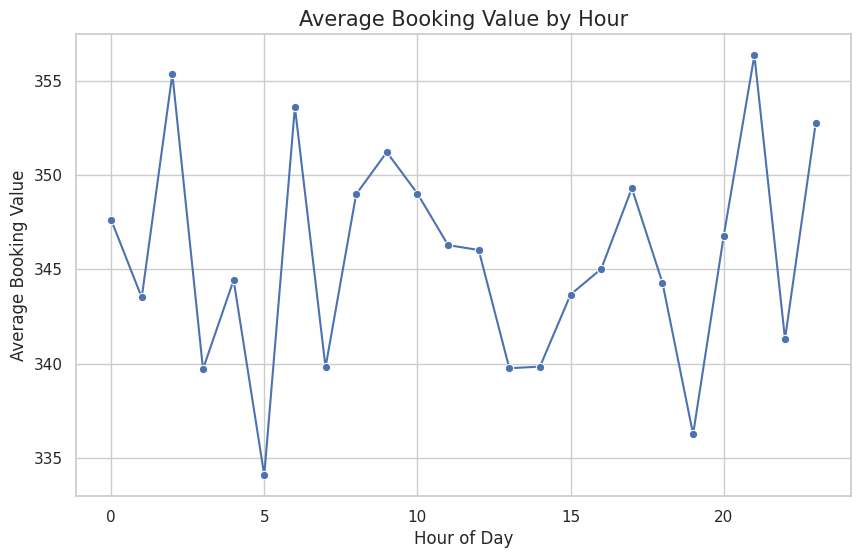

In [29]:
avg_booking_value_by_hour = df.groupby('Hour')['Booking Value'].mean()

fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(x=avg_booking_value_by_hour.index, y=avg_booking_value_by_hour.values, marker='o', ax=ax)
ax.set_title('Average Booking Value by Hour', fontsize = 15)
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Average Booking Value')
plt.show()

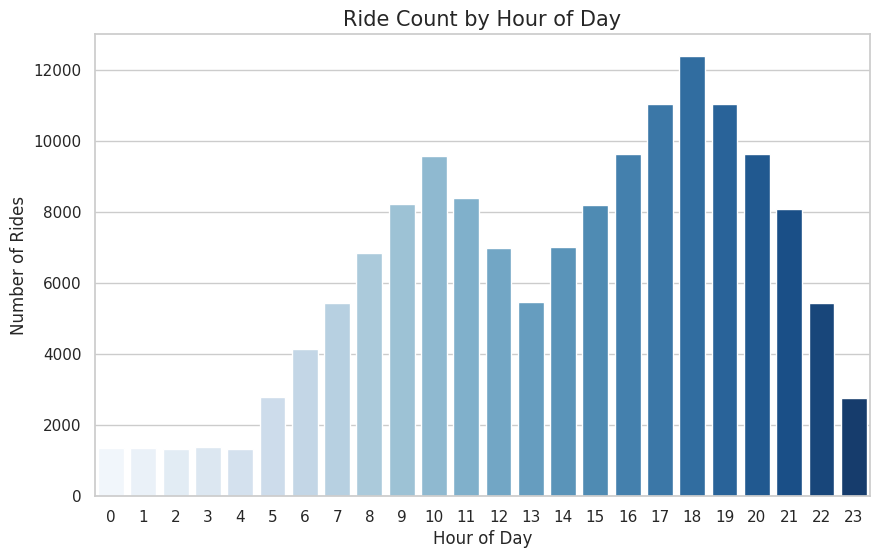

In [30]:
rides_by_hour = df.groupby('Hour').size()

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=rides_by_hour.index, y=rides_by_hour.values, palette='Blues', ax=ax)
ax.set_title('Ride Count by Hour of Day', fontsize = 15)
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Number of Rides')
plt.show()

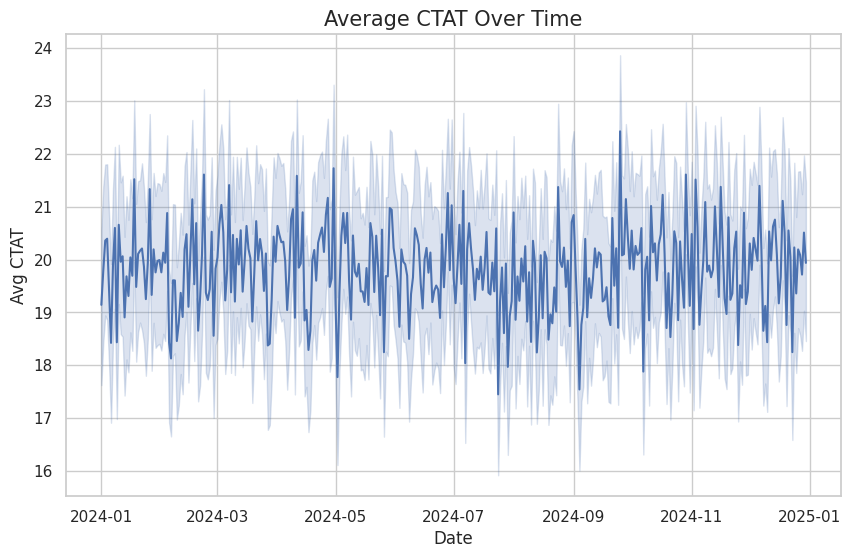

In [31]:
fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(data=df, x='Date', y='Avg CTAT', ax=ax)
ax.set_title('Average CTAT Over Time', fontsize = 15)
ax.set_xlabel('Date')
ax.set_ylabel('Avg CTAT')
plt.show()

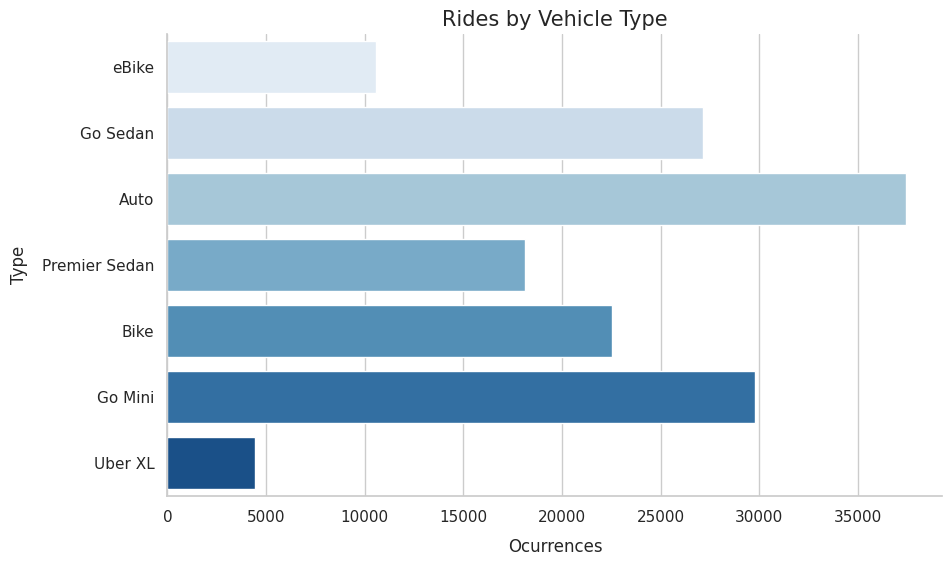

In [32]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(data = df, y='Vehicle Type',palette='Blues')

plt.ylabel('Type',labelpad=10)
plt.xlabel('Ocurrences',labelpad=10)
ax.set_title('Rides by Vehicle Type', fontsize = 15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

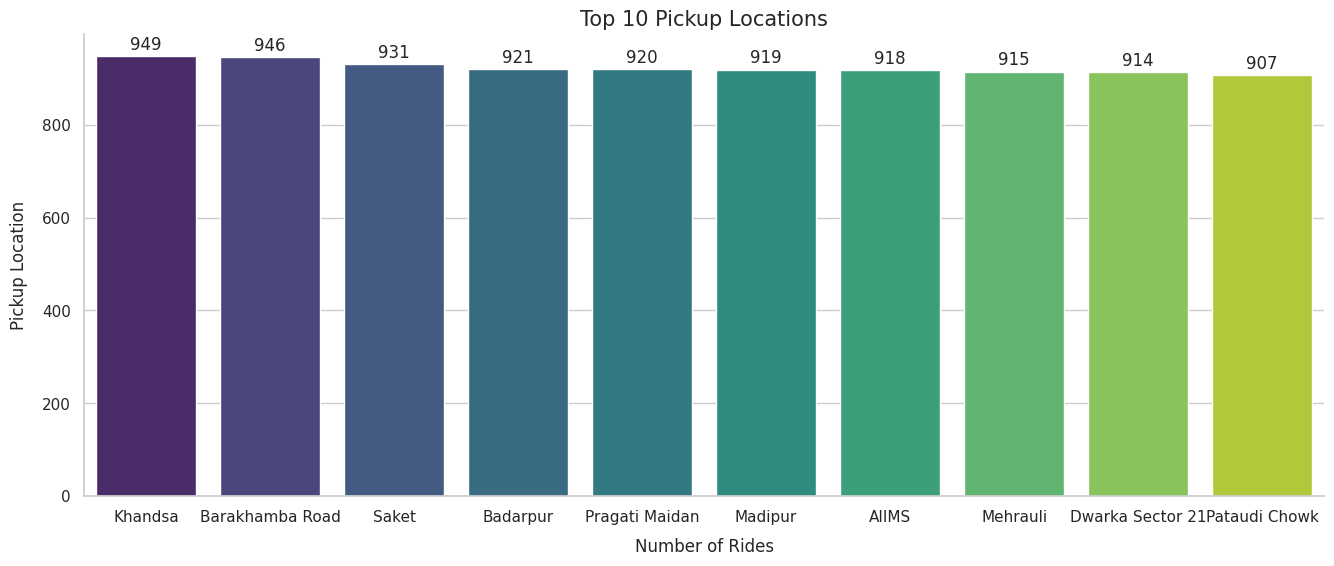

In [33]:
plot_pickup_location = df['Pickup Location'].value_counts().head(10)
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(y=plot_pickup_location.values, x=plot_pickup_location.index, palette='viridis', ax=ax)
ax.set_xlabel('Number of Rides',labelpad = 10)
ax.set_ylabel('Pickup Location',labelpad=10)
ax.set_title('Top 10 Pickup Locations', fontsize = 15)

# adding values to bar label
for container in ax.containers:
    ax.bar_label(container,padding=2)

# removing spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

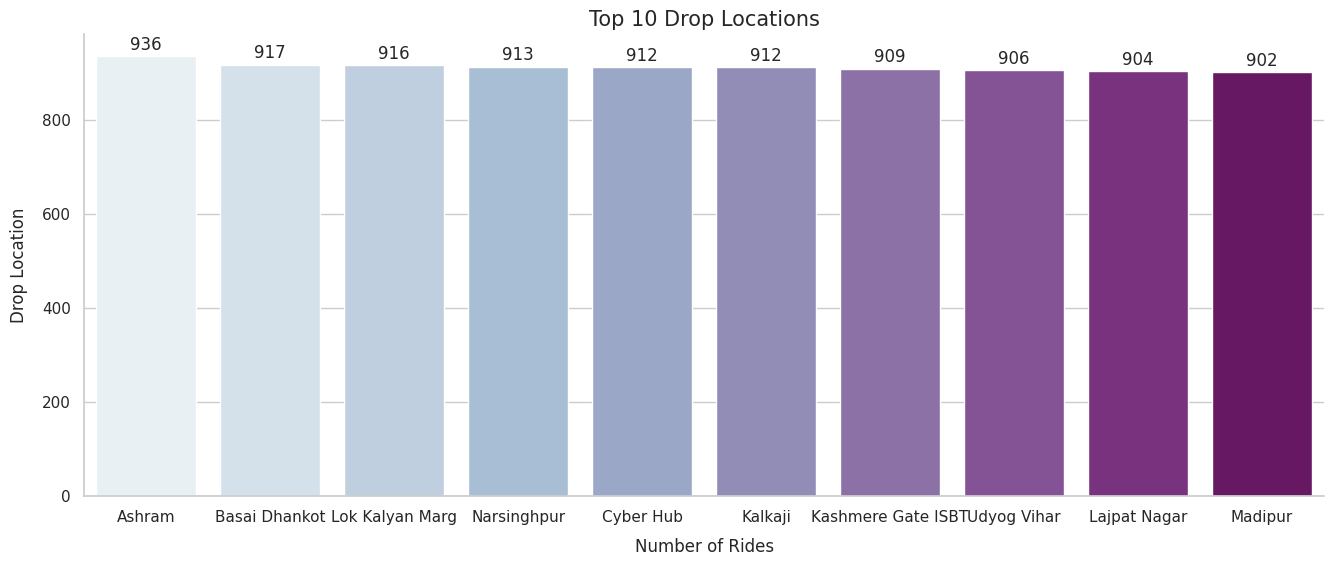

In [34]:
plot_drop_location = df['Drop Location'].value_counts().head(10)
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(y=plot_drop_location.values, x=plot_drop_location.index, palette='BuPu',ax=ax)
ax.set_xlabel('Number of Rides',labelpad = 10)
ax.set_ylabel('Drop Location',labelpad=10)
ax.set_title('Top 10 Drop Locations', fontsize = 15)

# adding values to bar label
for container in ax.containers:
    ax.bar_label(container,padding=2)

# removing spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

## Cancellations

In [35]:
df['is_cancelled_customer'] = df['Cancelled Rides by Customer'].astype(bool)
df['is_cancelled_driver'] = df['Cancelled Rides by Driver'].astype(bool)

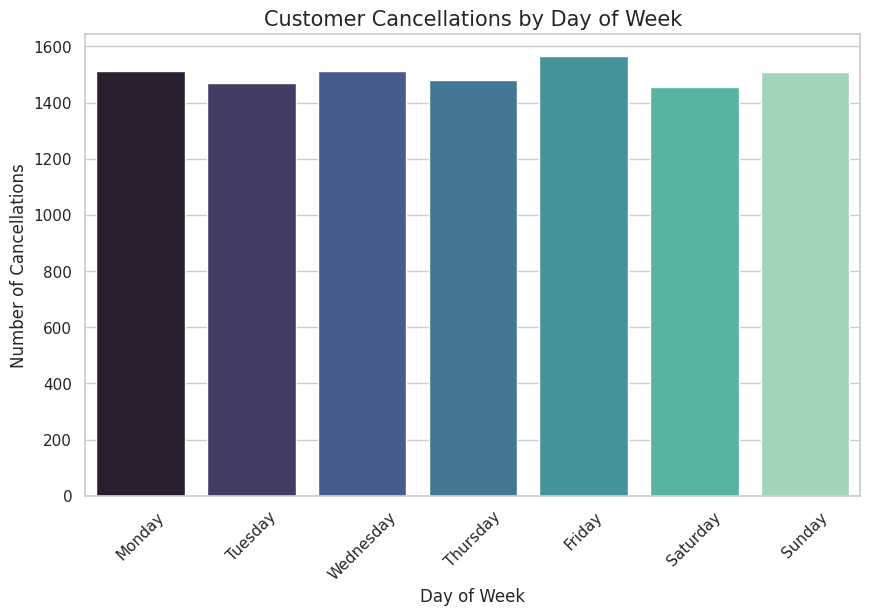

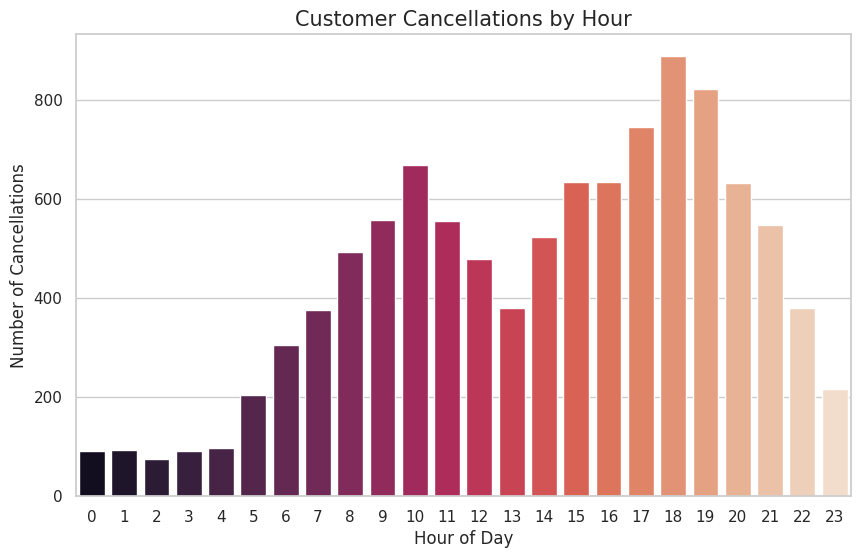

In [36]:
cancellations_by_day = df[df['is_cancelled_customer']].groupby('DayOfWeek').size().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
) # filtering only true values

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=cancellations_by_day.index, y=cancellations_by_day.values, palette='mako', ax=ax)
ax.set_title('Customer Cancellations by Day of Week', fontsize = 15)
ax.set_xlabel('Day of Week')
ax.set_ylabel('Number of Cancellations')
plt.xticks(rotation=45)
plt.show()

cancelled_by_hour = df[df['is_cancelled_customer']].groupby('Hour').size()

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=cancelled_by_hour.index, y=cancelled_by_hour.values, palette='rocket', ax=ax)
ax.set_title('Customer Cancellations by Hour', fontsize = 15)
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Number of Cancellations')
plt.show()

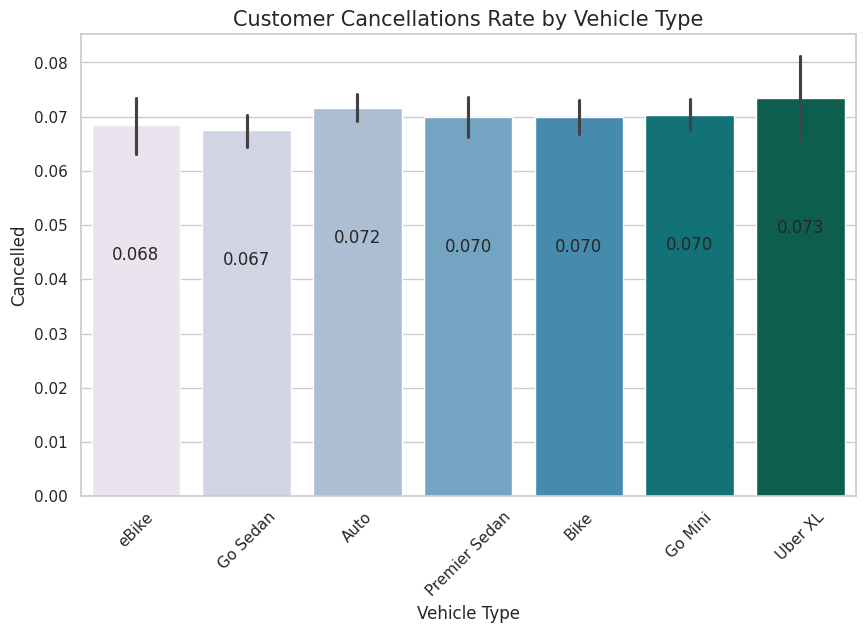

In [37]:
fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(data=df, x='Vehicle Type', y='is_cancelled_customer',palette=palettes[random.randint(0,len(palettes))-1])
plt.title("Customer Cancellations Rate by Vehicle Type", fontsize = 15)
plt.xticks(rotation=45)

plt.ylabel('Cancelled')

# adding values to bar label
for container in ax.containers:
    ax.bar_label(container, padding=-100, fmt='%.3f')

plt.show()

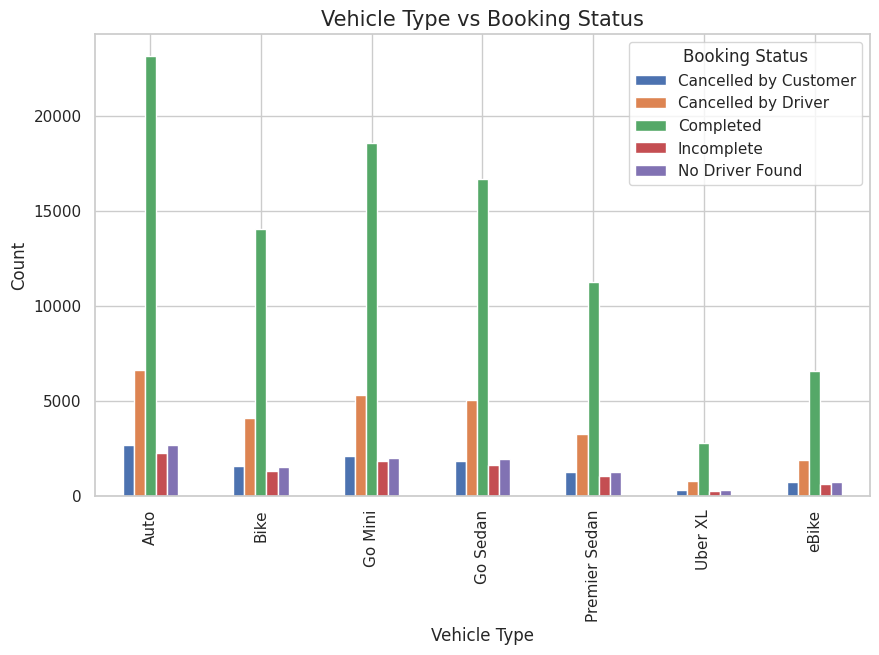

In [38]:
pd.crosstab(df['Vehicle Type'], df['Booking Status']).plot(kind="bar", figsize=(10,6))
plt.title("Vehicle Type vs Booking Status", fontsize = 15)
plt.ylabel("Count")
plt.show()

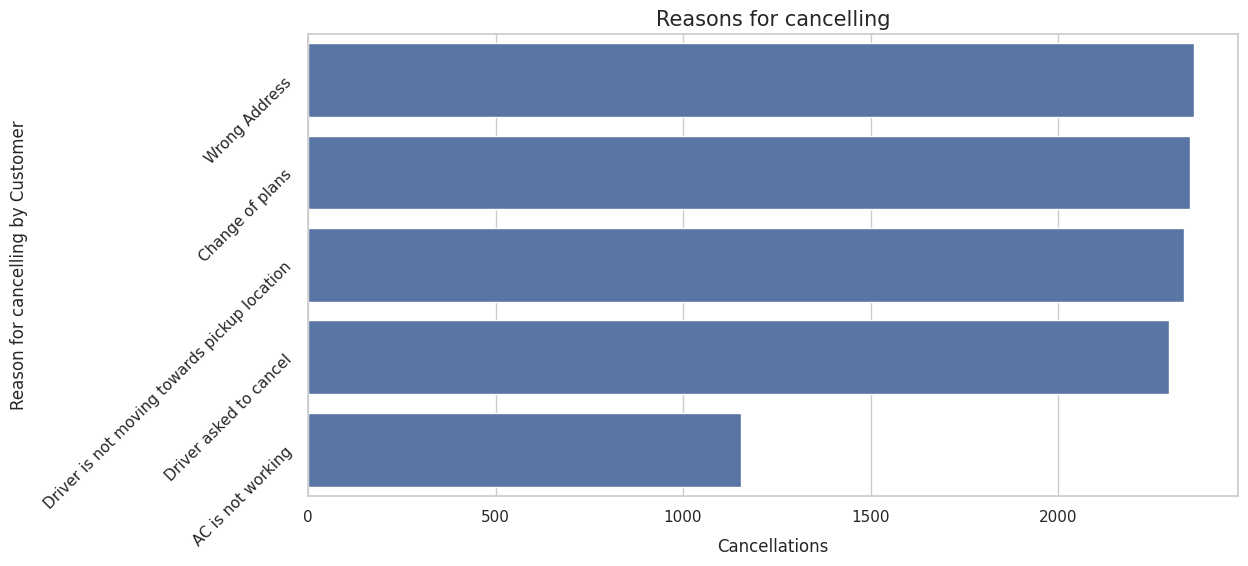

In [39]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x = df['Reason for cancelling by Customer'].value_counts()[1:], y =  df['Reason for cancelling by Customer'].value_counts()[1:].index)
# starts by 1 for exclude 'Not cancelled'

plt.yticks(rotation=45)
ax.set_ylabel(ax.get_ylabel(), labelpad=10)
ax.set_xlabel('Cancellations',labelpad=10)
plt.title('Reasons for cancelling', fontsize = 15)

plt.show()

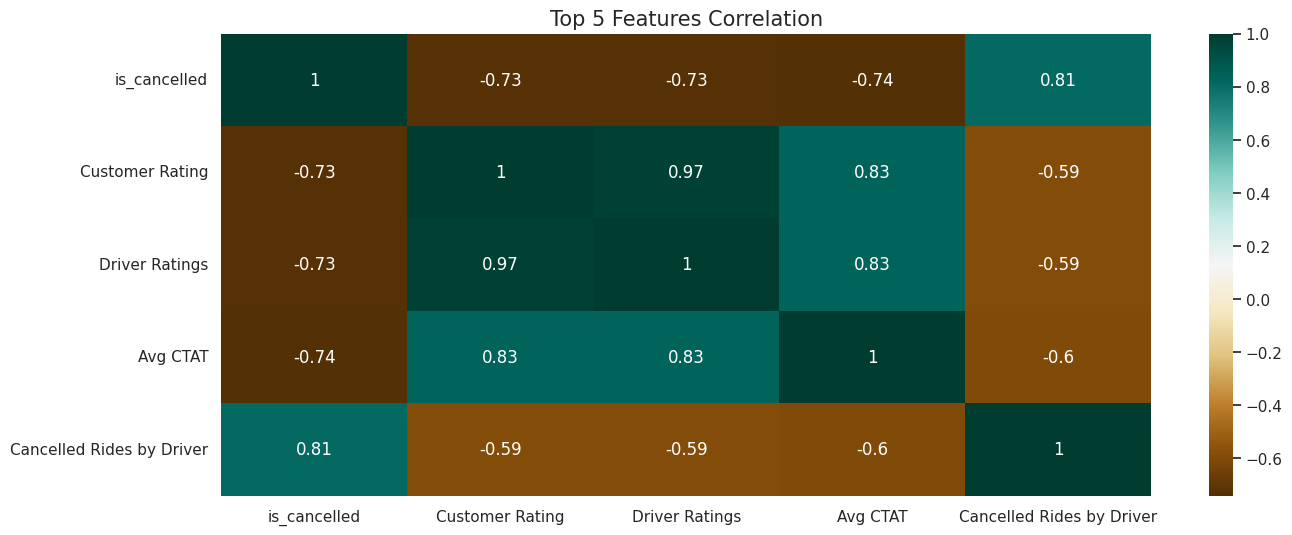

In [40]:
import numpy as np

corrmat = df.corr(numeric_only=True).abs().sum().sort_values(ascending=False).head(5)
top_corr_features = corrmat.index
plt.figure(figsize=(15,6))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="BrBG")
plt.title('Top 5 Features Correlation', fontsize = 15)
plt.show()

## Rate

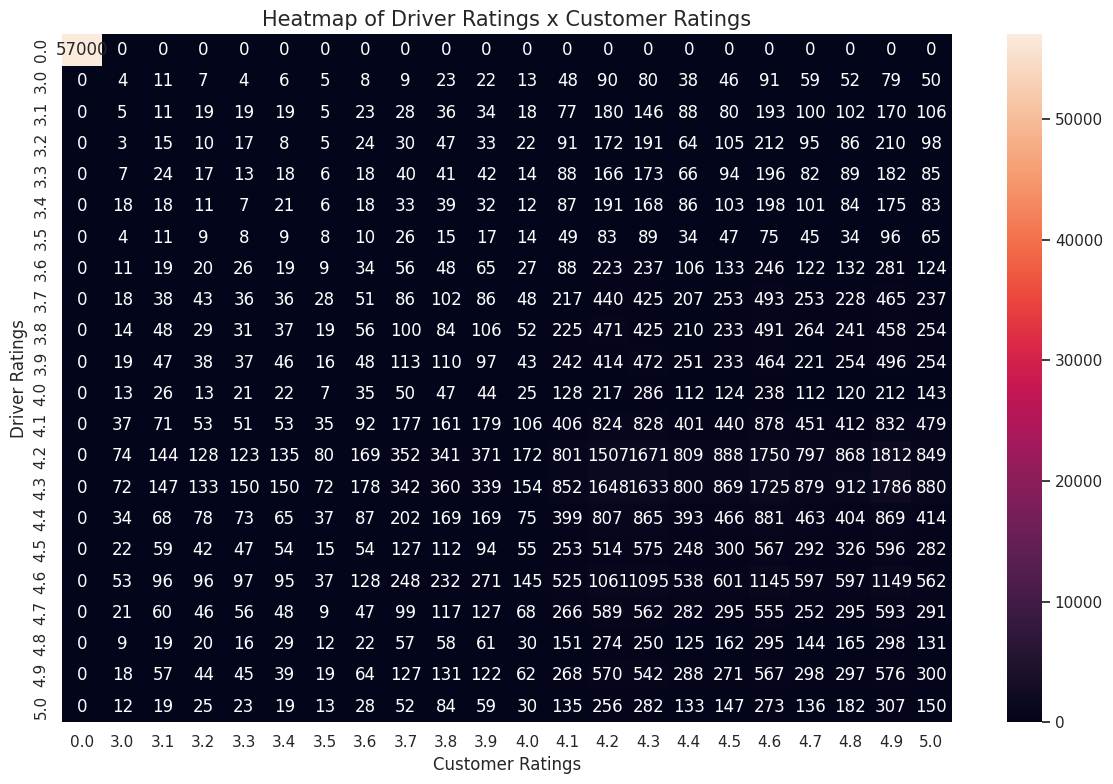

In [41]:
plt.figure(figsize=(12,8))
sns.heatmap(pd.crosstab(df["Driver Ratings"], df["Customer Rating"]), annot=True, fmt="d")
plt.title("Heatmap of Driver Ratings x Customer Ratings", fontsize = 15)
plt.xlabel("Customer Ratings")
plt.ylabel("Driver Ratings")
plt.tight_layout()
plt.show()

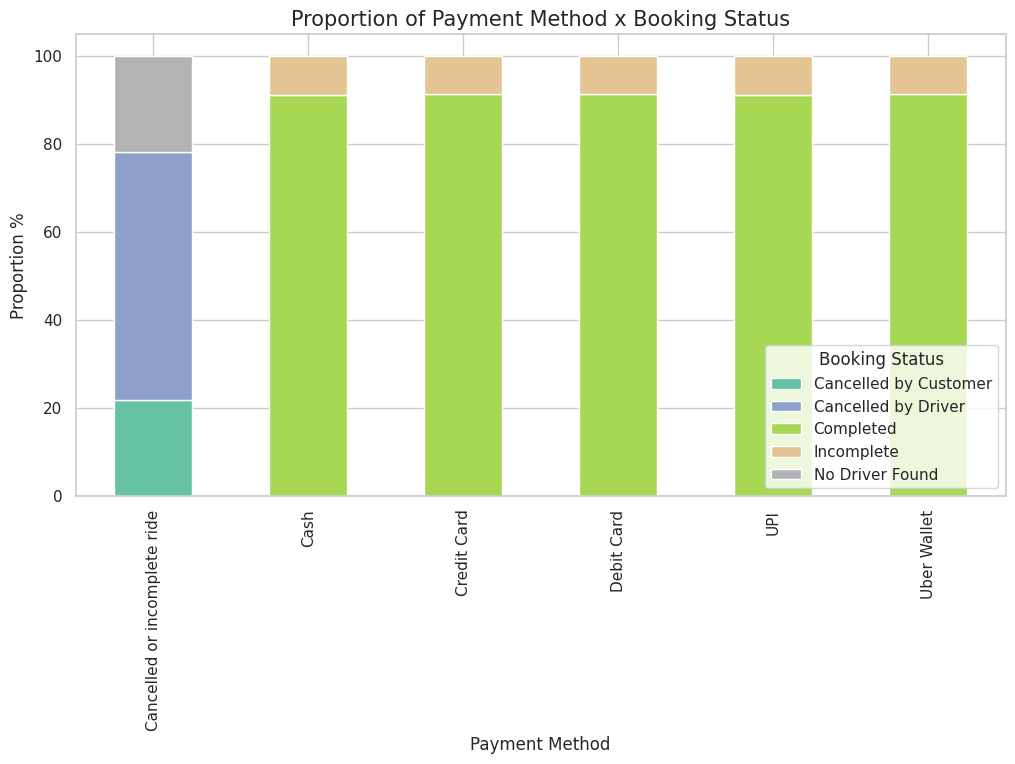

In [42]:
# Crosstab for Payment Method vs Booking Status
ct = pd.crosstab(df['Payment Method'], df['Booking Status'], normalize='index') * 100

# Stacked bar chart
ct.plot(kind="bar", stacked=True, figsize=(12,6), colormap="Set2")
plt.title("Proportion of Payment Method x Booking Status", fontsize = 15)
plt.ylabel("Proportion %")
plt.xlabel("Payment Method")
plt.legend(title="Booking Status")
plt.xticks(rotation=90)
plt.show()

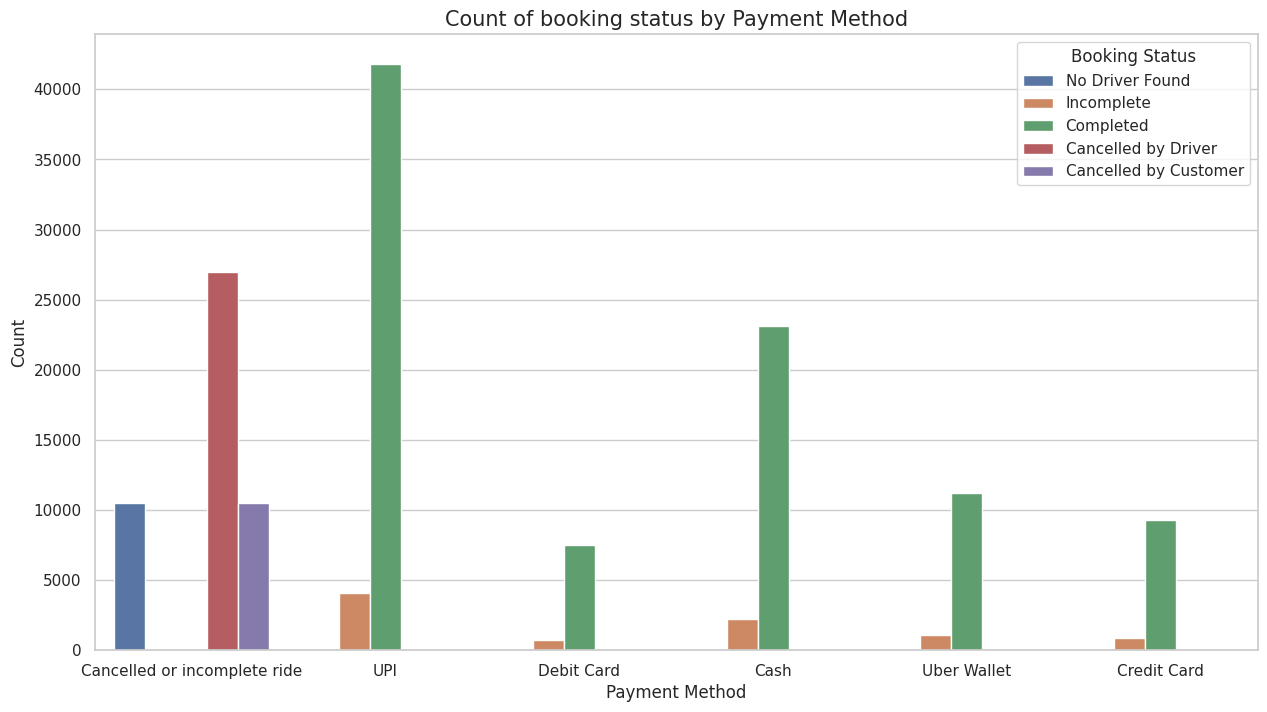

In [43]:
fig,ax = plt.subplots(figsize=(15,8))

sns.countplot(data = df,
              x = 'Payment Method',
              hue = 'Booking Status',)
plt.title('Count of booking status by Payment Method', fontsize = 15)
plt.ylabel('Count')
plt.show()

In [44]:
df.columns

Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT',
       'Avg CTAT', 'Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method', 'is_cancelled',
       'DayOfWeek', 'Hour', 'is_cancelled_customer', 'is_cancelled_driver'],
      dtype='object')

In [45]:
df.drop(columns=['Driver Cancellation Reason','Reason for cancelling by Customer','Incomplete Rides Reason'])

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,is_cancelled,DayOfWeek,Hour,is_cancelled_customer,is_cancelled_driver
0,2024-03-23,2025-10-06 12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,0.0,0.0,...,0.0,0.00,0.0,0.0,Cancelled or incomplete ride,0,Saturday,12,False,False
1,2024-11-29,2025-10-06 18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,237.0,5.73,0.0,0.0,UPI,0,Friday,18,False,False
2,2024-08-23,2025-10-06 08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,627.0,13.58,4.9,4.9,Debit Card,0,Friday,8,False,False
3,2024-10-21,2025-10-06 17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,416.0,34.02,4.6,5.0,UPI,0,Monday,17,False,False
4,2024-09-16,2025-10-06 22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,737.0,48.21,4.1,4.3,UPI,0,Monday,22,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2024-11-11,2025-10-06 19:34:01,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,MG Road,Ghitorni,10.2,44.4,...,475.0,40.08,3.7,4.1,Uber Wallet,0,Monday,19,False,False
149996,2024-11-24,2025-10-06 15:55:09,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,Golf Course Road,Akshardham,5.1,30.8,...,1093.0,21.31,4.8,5.0,UPI,0,Sunday,15,False,False
149997,2024-09-18,2025-10-06 10:55:15,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,...,852.0,15.93,3.9,4.4,Cash,0,Wednesday,10,False,False
149998,2024-10-05,2025-10-06 07:53:34,"""CNR3030099""",Completed,"""CID9415487""",Auto,Ghaziabad,Saidulajab,6.9,39.6,...,333.0,45.54,4.1,3.7,UPI,0,Saturday,7,False,False


# Predictive Analytics with Machine Learning

In [46]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [47]:
le = LabelEncoder()

In [48]:
X, y = df.drop(columns=['Date','Time','Hour','Booking Status','Booking ID']), df['Booking Status']

In [49]:
X = X.apply(lambda col: le.fit_transform(col.astype(str))
            if col.dtypes == "object" else col)
y = LabelEncoder().fit_transform(y)


In [50]:
# handling Missing Values
# only impute numeric columns
num_cols = X.select_dtypes(include=['number']).columns
imp_mean = SimpleImputer(strategy="median")
X[num_cols] = imp_mean.fit_transform(X[num_cols])



In [51]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
# the 'stratify=y' argument ensures that the train and test sets have the same proportion of
# each class label as the original dataset

In [52]:
models = {
    'LogisticRegression' : LogisticRegression(),
    'KNeighborsClassifier' : KNeighborsClassifier(),
    'DecisionTreeClassifier' : DecisionTreeClassifier(max_depth = 2)
}

In [53]:
# loop through the models calculating and printing accuracy score
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'{name} model Accuracy score: {accuracy_score(y_test, y_pred)}')

LogisticRegression model Accuracy score: 0.7955666666666666
KNeighborsClassifier model Accuracy score: 0.7569666666666667
DecisionTreeClassifier model Accuracy score: 0.87


In [54]:
# loop through each model.
for name, model in models.items():
    # calculate cross-validation scores (here with 5 splits)
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

    print(f"[{name}] Cross-validated Accuracy: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

[LogisticRegression] Cross-validated Accuracy: 0.8023 (+/- 0.0028)
[KNeighborsClassifier] Cross-validated Accuracy: 0.7592 (+/- 0.0020)
[DecisionTreeClassifier] Cross-validated Accuracy: 0.8700 (+/- 0.0000)
